In [6]:
from ast import literal_eval
import urllib, json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


%matplotlib inline

## American Community Survey

In [3]:
# List of variables to get. See http://api.census.gov/data/2015/acs5/profile/variables.html for complete list
'''dct = {'DP03_0051E': 'households',
 'DP03_0052E': 'Less_10k', #Income variables
 'DP03_0053E': '10k_15k',
 'DP03_0054E': '15k_25k',
 'DP03_0055E': '25k_35k',
 'DP03_0056E': '35k_50k',
 'DP03_0057E': '50k_75k',
 'DP03_0058E': '75k_100k',
 'DP03_0059E': '100k_150k',
 'DP03_0060E': '150k_200k',
 'DP03_0061E': '200k_more',
 'DP03_0062E': 'Median_income',
 'DP03_0063E': 'Mean_income',
 'DP04_0089E': 'Median_unit_values',
 'DP05_0001E': 'Total_populaton',
 'DP05_0004E': 'Under_5_years', #Population under 5
 'DP05_0017E': 'Median_age', #Median age
 'DP02_0003E': 'Hh_w_children', #Family 
 'DP02_0015E': 'Avg_hh_size', 
 'DP02_0058E': 'Pop_over_25',
 'DP02_0059E': 'Less_9th', #Education
 'DP02_0060E': '12th_no_dip',
 'DP02_0061E': 'HighSchool',
 'DP02_0062E': 'Some_college',
 'DP02_0063E': 'Associate',
 'DP02_0064E': 'Bachelors',
 'DP02_0065E': 'Graduate' '''

dct = {'DP02_0066E': 'HS_higher',
 'DP02_0067E': 'BA_higher'
      }

lst = dct.keys()
var = ','.join(lst)
lst_names = dct.values()

#URL  http://api.census.gov/data/2015/acs5/profile?  State = 36 (New York), Level = Tract
key = 'ff3aee5f79063ffd4c2fa0b7912d2b83f974b2f8'
acs_url = 'http://api.census.gov/data/2015/acs5/profile?get={},NAME&for=tract:*&in=state:36&key={}'.format(var, key)

In [4]:
var

'DP02_0066E,DP02_0067E'

In [7]:
response = requests.get(acs_url)
#print(response.text)

In [8]:
request_content_list = literal_eval(response.text)
headers = request_content_list.pop(0)
acs = pd.DataFrame(request_content_list, columns=headers)
acs.head()

,DP02_0066E,DP02_0067E,NAME,state,county,tract
0,(X),(X),"Census Tract 1, Albany County, New York",36,001,000100
1,(X),(X),"Census Tract 2, Albany County, New York",36,001,000200
2,(X),(X),"Census Tract 3, Albany County, New York",36,001,000300
3,(X),(X),"Census Tract 4.01, Albany County, New York",36,001,000401
4,(X),(X),"Census Tract 4.03, Albany County, New York",36,001,000403


In [33]:
#Renaming features
acs.rename(columns=dct,inplace=True)

In [34]:
acs.head()

,12th_no_dip,Some_college,Median_income,Bachelors,75k_100k,150k_200k,Pop_over_25,Avg_hh_size,Hh_w_children,35k_50k,...,households,Total_populaton,50k_75k,25k_35k,Median_unit_values,Median_age,NAME,state,county,tract
0,117,385,25179,144,66,7,1225,2.44,231,88,...,815,2001,128,62,96000,33.8,"Census Tract 1, Albany County, New York",36,001,000100
1,264,579,26337,220,78,59,2758,2.21,420,257,...,2006,4519,283,213,85300,32.9,"Census Tract 2, Albany County, New York",36,001,000200
2,218,512,32244,422,214,29,3421,2.19,297,276,...,2311,5244,476,130,163600,34.2,"Census Tract 3, Albany County, New York",36,001,000300
3,138,278,72168,455,172,80,2212,1.75,127,178,...,1037,2423,184,90,154400,61.3,"Census Tract 4.01, Albany County, New York",36,001,000401
4,173,376,52857,797,301,113,3036,2.02,312,265,...,2300,4654,356,146,193200,34.1,"Census Tract 4.03, Albany County, New York",36,001,000403


In [35]:
# Creating full tract number 
acs["GEOID10"] = acs["state"].map(str) + acs["county"].map(str) + acs["tract"].map(str) 

In [36]:
acs['Tract_Name'], acs['County_Name'], acs['State_Name'] = acs['NAME'].str.split(pat=',', n=-1, expand=False).str

In [37]:
acs.columns

Index([u'12th_no_dip', u'Some_college', u'Median_income', u'Bachelors',
       u'75k_100k', u'150k_200k', u'Pop_over_25', u'Avg_hh_size',
       u'Hh_w_children', u'35k_50k', u'15k_25k', u'Less_10k', u'Under_5_years',
       u'HighSchool', u'Associate', u'Mean_income', u'200k_more', u'Graduate',
       u'100k_150k', u'10k_15k', u'Less_9th', u'households',
       u'Total_populaton', u'50k_75k', u'25k_35k', u'Median_unit_values',
       u'Median_age', u'NAME', u'state', u'county', u'tract', u'GEOID10',
       u'Tract_Name', u'County_Name', u'State_Name'],
      dtype='object')

In [38]:
# Changing type to numeric
for fea  in lst_names:
    acs[fea] = pd.to_numeric(acs[fea], errors='coerce')

acs["GEOID10"] = pd.to_numeric(acs['GEOID10'], errors='coerce')

In [40]:
#Creating features
#Percent of population with bachelors degree or more
#acs['Bachelor_percent']= acs['Bachelors']/acs['Pop_over_25']
#acs['BA_higher_percent'] = acs['BA_higher']/acs['Pop_over_25']
#Percent of households with children
acs['w_child_percent']= acs['Hh_w_children']/acs['households']

In [41]:
X = acs[['Median_income', 'Avg_hh_size', 'Median_unit_values', 'Median_age', 'Bachelor_percent','w_child_percent']]

In [42]:
X.head()

,Median_income,Avg_hh_size,Median_unit_values,Median_age,Bachelor_percent,w_child_percent
0,25179.0,2.44,96000.0,33.8,0.117551,0.283436
1,26337.0,2.21,85300.0,32.9,0.079768,0.209372
2,32244.0,2.19,163600.0,34.2,0.123356,0.128516
3,72168.0,1.75,154400.0,61.3,0.205696,0.122469
4,52857.0,2.02,193200.0,34.1,0.262516,0.135652


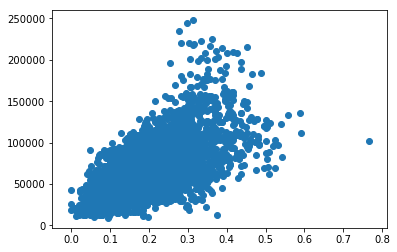

In [43]:
plt.scatter(X['Bachelor_percent'],X['Median_income'])

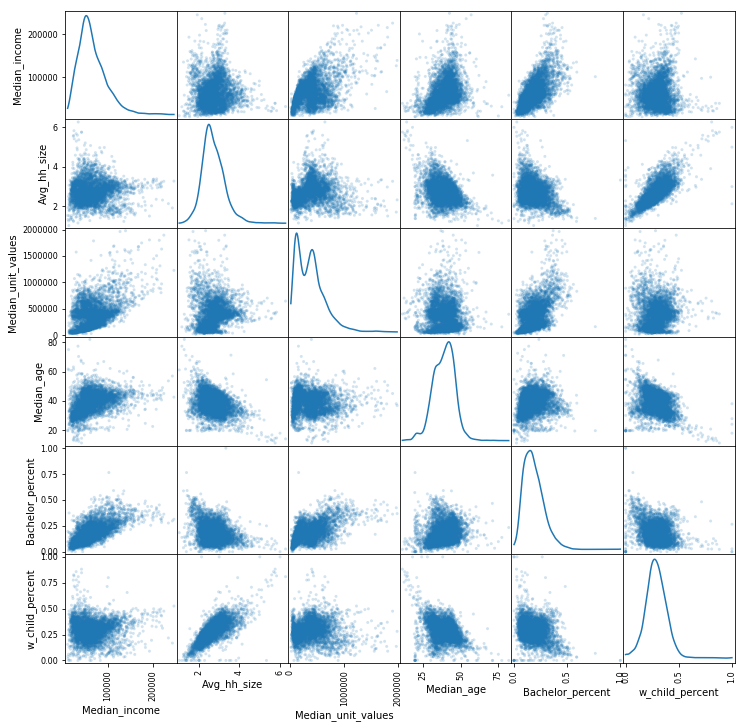

In [44]:
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha=0.2, figsize=(12, 12), diagonal='kde');

In [45]:
solar_tract = pd.read_csv('input/solar_tract.csv')
demog = acs[['Median_income', 'Avg_hh_size', 'Median_unit_values', 'Median_age', 'Bachelor_percent','w_child_percent','GEOID10']]

In [46]:
solar_tract.head()

,GEOID10,Affordable_Solar,Community_Distributed_Generation,Expected_KWh_Annual_Production,Total_Nameplate_kW_DC,Project_Cost,cost_Kw,Project_Number
0,36001000200,0,0,87768.03,74.79,23172.450000,4974.023375,16
1,36001000300,0,0,32221.91,27.45,110980.000000,4042.987250,1
2,36001000501,0,0,782892.60,666.97,103380.529677,4891.021198,31
3,36001001100,0,0,734729.95,625.94,83855.163871,4502.370331,31
4,36001001700,0,0,948976.87,808.55,31547.046992,4847.345121,123


In [47]:
combined = acs.merge(solar_tract, left_on='GEOID10', right_on='GEOID10', how='left')

In [48]:
combined.head()

,12th_no_dip,Some_college,Median_income,Bachelors,75k_100k,150k_200k,Pop_over_25,Avg_hh_size,Hh_w_children,35k_50k,...,State_Name,Bachelor_percent,w_child_percent,Affordable_Solar,Community_Distributed_Generation,Expected_KWh_Annual_Production,Total_Nameplate_kW_DC,Project_Cost,cost_Kw,Project_Number
0,117,385,25179.0,144,66,7,1225,2.44,231,88,...,New York,0.117551,0.283436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,264,579,26337.0,220,78,59,2758,2.21,420,257,...,New York,0.079768,0.209372,0.0,0.0,87768.03,74.79,23172.45,4974.023375,16.0
2,218,512,32244.0,422,214,29,3421,2.19,297,276,...,New York,0.123356,0.128516,0.0,0.0,32221.91,27.45,110980.00,4042.987250,1.0
3,138,278,72168.0,455,172,80,2212,1.75,127,178,...,New York,0.205696,0.122469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,173,376,52857.0,797,301,113,3036,2.02,312,265,...,New York,0.262516,0.135652,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
solar_tract.head()

,GEOID10,Affordable_Solar,Community_Distributed_Generation,Expected_KWh_Annual_Production,Total_Nameplate_kW_DC,Project_Cost,cost_Kw,Project_Number
0,36001000200,0,0,87768.03,74.79,23172.450000,4974.023375,16
1,36001000300,0,0,32221.91,27.45,110980.000000,4042.987250,1
2,36001000501,0,0,782892.60,666.97,103380.529677,4891.021198,31
3,36001001100,0,0,734729.95,625.94,83855.163871,4502.370331,31
4,36001001700,0,0,948976.87,808.55,31547.046992,4847.345121,123


In [50]:
combined[['Affordable_Solar', 'Community_Distributed_Generation',
          'Expected_KWh_Annual_Production', 'Total_Nameplate_kW_DC', 'Project_Number']]=combined[['Affordable_Solar', 'Community_Distributed_Generation',
          'Expected_KWh_Annual_Production', 'Total_Nameplate_kW_DC', 'Project_Number']].fillna(0)

In [51]:
combined.head()

,12th_no_dip,Some_college,Median_income,Bachelors,75k_100k,150k_200k,Pop_over_25,Avg_hh_size,Hh_w_children,35k_50k,...,State_Name,Bachelor_percent,w_child_percent,Affordable_Solar,Community_Distributed_Generation,Expected_KWh_Annual_Production,Total_Nameplate_kW_DC,Project_Cost,cost_Kw,Project_Number
0,117,385,25179.0,144,66,7,1225,2.44,231,88,...,New York,0.117551,0.283436,0.0,0.0,0.00,0.00,NaN,NaN,0.0
1,264,579,26337.0,220,78,59,2758,2.21,420,257,...,New York,0.079768,0.209372,0.0,0.0,87768.03,74.79,23172.45,4974.023375,16.0
2,218,512,32244.0,422,214,29,3421,2.19,297,276,...,New York,0.123356,0.128516,0.0,0.0,32221.91,27.45,110980.00,4042.987250,1.0
3,138,278,72168.0,455,172,80,2212,1.75,127,178,...,New York,0.205696,0.122469,0.0,0.0,0.00,0.00,NaN,NaN,0.0
4,173,376,52857.0,797,301,113,3036,2.02,312,265,...,New York,0.262516,0.135652,0.0,0.0,0.00,0.00,NaN,NaN,0.0


In [52]:
combined['Project_yes'] = (combined['Project_Number']>0)

In [53]:
sum(combined['Project_Number'].isnull())

0

In [54]:
combined['Project_yes'].value_counts()

False    3721
True     1197
Name: Project_yes, dtype: int64

In [55]:
combined.head()

,12th_no_dip,Some_college,Median_income,Bachelors,75k_100k,150k_200k,Pop_over_25,Avg_hh_size,Hh_w_children,35k_50k,...,Bachelor_percent,w_child_percent,Affordable_Solar,Community_Distributed_Generation,Expected_KWh_Annual_Production,Total_Nameplate_kW_DC,Project_Cost,cost_Kw,Project_Number,Project_yes
0,117,385,25179.0,144,66,7,1225,2.44,231,88,...,0.117551,0.283436,0.0,0.0,0.00,0.00,NaN,NaN,0.0,False
1,264,579,26337.0,220,78,59,2758,2.21,420,257,...,0.079768,0.209372,0.0,0.0,87768.03,74.79,23172.45,4974.023375,16.0,True
2,218,512,32244.0,422,214,29,3421,2.19,297,276,...,0.123356,0.128516,0.0,0.0,32221.91,27.45,110980.00,4042.987250,1.0,True
3,138,278,72168.0,455,172,80,2212,1.75,127,178,...,0.205696,0.122469,0.0,0.0,0.00,0.00,NaN,NaN,0.0,False
4,173,376,52857.0,797,301,113,3036,2.02,312,265,...,0.262516,0.135652,0.0,0.0,0.00,0.00,NaN,NaN,0.0,False


In [57]:
temp = combined[combined['Project_yes']==0]
temp1 = combined[combined['Project_yes']==1]

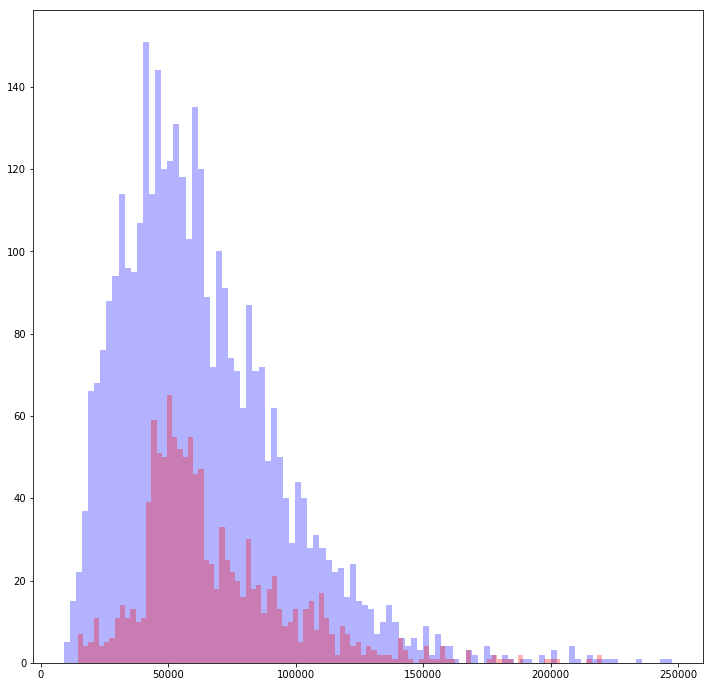

In [58]:
fig, ax = plt.subplots(figsize=(12,12))
ax.hist(temp['Median_income'].dropna(), alpha=0.3, color='blue', bins=100)
ax.hist(temp1['Median_income'].dropna(), alpha=0.3, color='red', bins=100);

In [59]:
project = np.array([  7.,   5.,   4.,  11.,   4.,   8.,   3.,  12.,  13.,  11.,  14.,
          9.,  14.,  43.,  56.,  55.,  52.,  64.,  51.,  53.,  54.,  53.,
         46.,  46.,  28.,  20.,  20.,  35.,  20.,  23.,  18.,  23.,  23.,
         18.,  20.,  13.,  19.,  21.,  10.,   9.,  12.,   8.,   9.,  14.,
         10.,  13.,  15.,  12.,   3.,   7.,   5.,   8.,   4.,   4.,   4.,
          3.,   1.,   3.,   1.,   2.,   5.,   4.,   1.,   0.,   1.,   2.,
          3.,   0.,   4.,   2.,   1.,   0.,   0.,   3.,   0.,   0.,   0.,
          0.,   2.,   2.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,
          1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.])
no_project = np.array([  14496.        ,   16573.8989899 ,   18651.7979798 ,
          20729.6969697 ,   22807.5959596 ,   24885.49494949,
          26963.39393939,   29041.29292929,   31119.19191919,
          33197.09090909,   35274.98989899,   37352.88888889,
          39430.78787879,   41508.68686869,   43586.58585859,
          45664.48484848,   47742.38383838,   49820.28282828,
          51898.18181818,   53976.08080808,   56053.97979798,
          58131.87878788,   60209.77777778,   62287.67676768,
          64365.57575758,   66443.47474747,   68521.37373737,
          70599.27272727,   72677.17171717,   74755.07070707,
          76832.96969697,   78910.86868687,   80988.76767677,
          83066.66666667,   85144.56565657,   87222.46464646,
          89300.36363636,   91378.26262626,   93456.16161616,
          95534.06060606,   97611.95959596,   99689.85858586,
         101767.75757576,  103845.65656566,  105923.55555556,
         108001.45454545,  110079.35353535,  112157.25252525,
         114235.15151515,  116313.05050505,  118390.94949495,
         120468.84848485,  122546.74747475,  124624.64646465,
         126702.54545455,  128780.44444444,  130858.34343434,
         132936.24242424,  135014.14141414,  137092.04040404,
         139169.93939394,  141247.83838384,  143325.73737374,
         145403.63636364,  147481.53535354,  149559.43434343,
         151637.33333333,  153715.23232323,  155793.13131313,
         157871.03030303,  159948.92929293,  162026.82828283,
         164104.72727273,  166182.62626263,  168260.52525253,
         170338.42424242,  172416.32323232,  174494.22222222,
         176572.12121212,  178650.02020202,  180727.91919192,
         182805.81818182,  184883.71717172,  186961.61616162,
         189039.51515152,  191117.41414141,  193195.31313131,
         195273.21212121,  197351.11111111,  199429.01010101,
         201506.90909091,  203584.80808081,  205662.70707071,
         207740.60606061,  209818.50505051,  211896.4040404 ,
         213974.3030303 ,  216052.2020202 ,  218130.1010101 ])


In [60]:
ratio = project/no_project

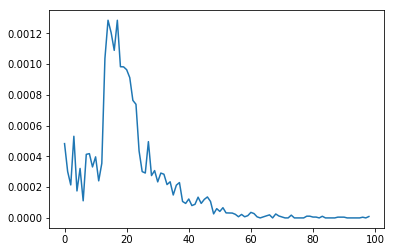

In [61]:
plt.plot(ratio)

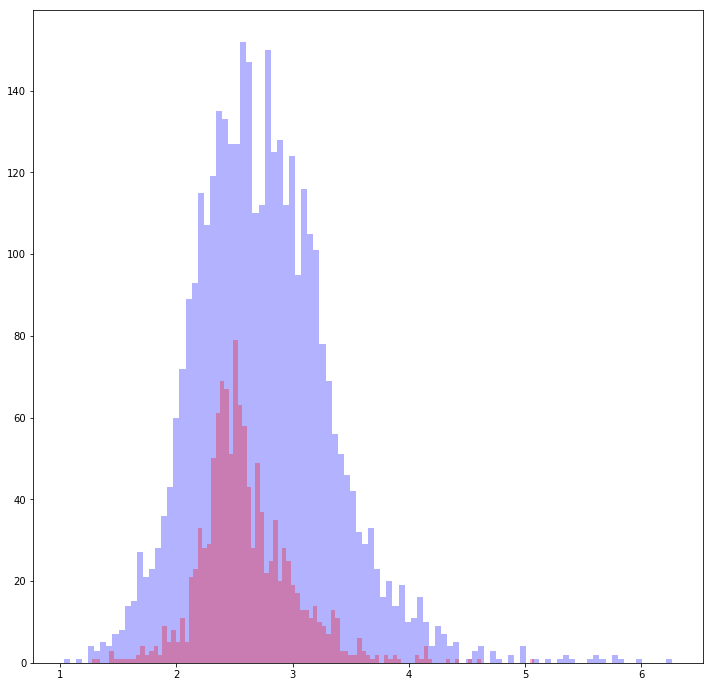

In [62]:
fig, ax = plt.subplots(figsize=(12,12))
ax.hist(temp['Avg_hh_size'].dropna(), alpha=0.3, color='blue', bins=100)
ax.hist(temp1['Avg_hh_size'].dropna(), alpha=0.3, color='red', bins=100);

In [63]:
hh_size_project = np.array([  1.,   1.,   0.,   0.,   3.,   1.,   1.,   1.,   1.,   1.,   2.,
          4.,   2.,   3.,   4.,   2.,   9.,   5.,   8.,   5.,  11.,   5.,
         21.,  23.,  33.,  28.,  29.,  50.,  61.,  69.,  67.,  51.,  79.,
         63.,  58.,  43.,  28.,  49.,  37.,  22.,  25.,  35.,  20.,  28.,
         25.,  19.,  17.,  13.,  13.,  11.,  14.,  10.,   9.,   7.,  13.,
         11.,   3.,   3.,   2.,   2.,   6.,   3.,   2.,   1.,   2.,   0.,
          2.,   1.,   2.,   1.,   0.,   0.,   0.,   2.,   1.,   4.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.])

hh_size_no_project = np.array([ 1.27  ,  1.3081,  1.3462,  1.3843,  1.4224,  1.4605,  1.4986,
         1.5367,  1.5748,  1.6129,  1.651 ,  1.6891,  1.7272,  1.7653,
         1.8034,  1.8415,  1.8796,  1.9177,  1.9558,  1.9939,  2.032 ,
         2.0701,  2.1082,  2.1463,  2.1844,  2.2225,  2.2606,  2.2987,
         2.3368,  2.3749,  2.413 ,  2.4511,  2.4892,  2.5273,  2.5654,
         2.6035,  2.6416,  2.6797,  2.7178,  2.7559,  2.794 ,  2.8321,
         2.8702,  2.9083,  2.9464,  2.9845,  3.0226,  3.0607,  3.0988,
         3.1369,  3.175 ,  3.2131,  3.2512,  3.2893,  3.3274,  3.3655,
         3.4036,  3.4417,  3.4798,  3.5179,  3.556 ,  3.5941,  3.6322,
         3.6703,  3.7084,  3.7465,  3.7846,  3.8227,  3.8608,  3.8989,
         3.937 ,  3.9751,  4.0132,  4.0513,  4.0894,  4.1275,  4.1656,
         4.2037,  4.2418,  4.2799,  4.318 ,  4.3561,  4.3942,  4.4323,
         4.4704,  4.5085,  4.5466,  4.5847,  4.6228,  4.6609,  4.699 ,
         4.7371,  4.7752,  4.8133,  4.8514,  4.8895,  4.9276,  4.9657,
         5.0038,  5.0419])

ratio_hh_size = hh_size_project/hh_size_no_project

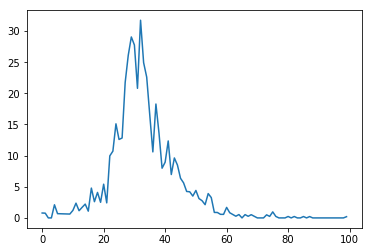

In [64]:
plt.plot(ratio_hh_size)

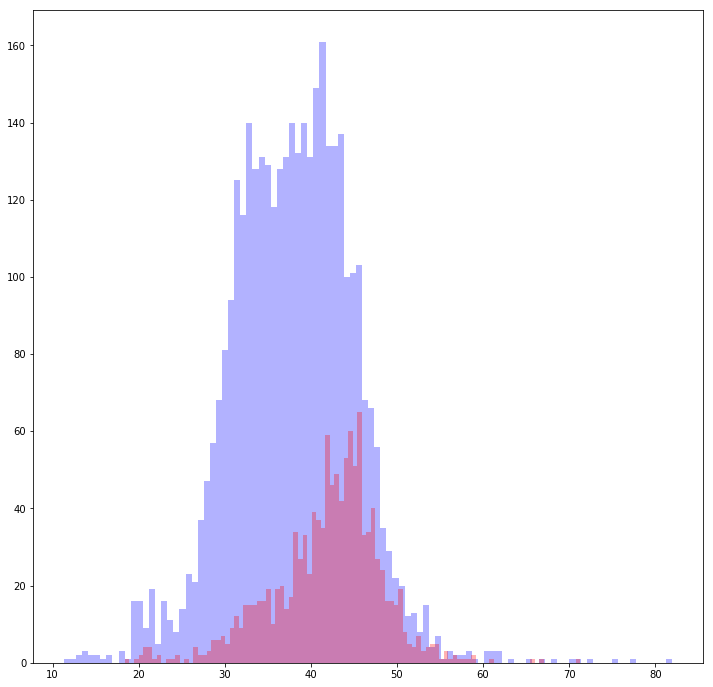

In [65]:
fig, ax = plt.subplots(figsize=(12,12))
ax.hist(temp['Median_age'].dropna(), alpha=0.3, color='blue', bins=100)
ax.hist(temp1['Median_age'].dropna(), alpha=0.3, color='red', bins=100);

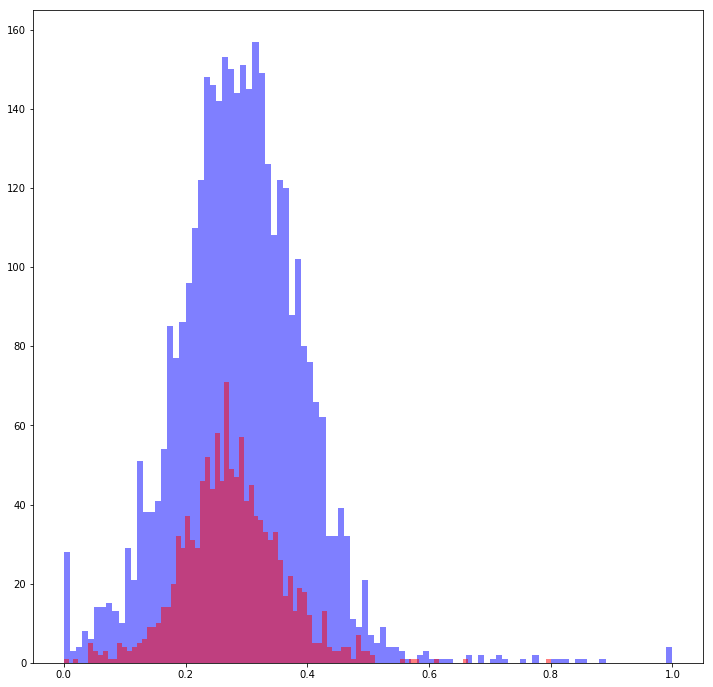

In [66]:
fig, ax = plt.subplots(figsize=(12,12))
ax.hist(temp['w_child_percent'].dropna(), alpha=0.5, color='blue', bins=100)
ax.hist(temp1['w_child_percent'].dropna(), alpha=0.5, color='red', bins=100);

In [67]:
combined.columns

Index([u'12th_no_dip', u'Some_college', u'Median_income', u'Bachelors',
       u'75k_100k', u'150k_200k', u'Pop_over_25', u'Avg_hh_size',
       u'Hh_w_children', u'35k_50k', u'15k_25k', u'Less_10k', u'Under_5_years',
       u'HighSchool', u'Associate', u'Mean_income', u'200k_more', u'Graduate',
       u'100k_150k', u'10k_15k', u'Less_9th', u'households',
       u'Total_populaton', u'50k_75k', u'25k_35k', u'Median_unit_values',
       u'Median_age', u'NAME', u'state', u'county', u'tract', u'GEOID10',
       u'Tract_Name', u'County_Name', u'State_Name', u'Bachelor_percent',
       u'w_child_percent', u'Affordable_Solar',
       u'Community_Distributed_Generation', u'Expected_KWh_Annual_Production',
       u'Total_Nameplate_kW_DC', u'Project_Cost', u'cost_Kw',
       u'Project_Number', u'Project_yes'],
      dtype='object')

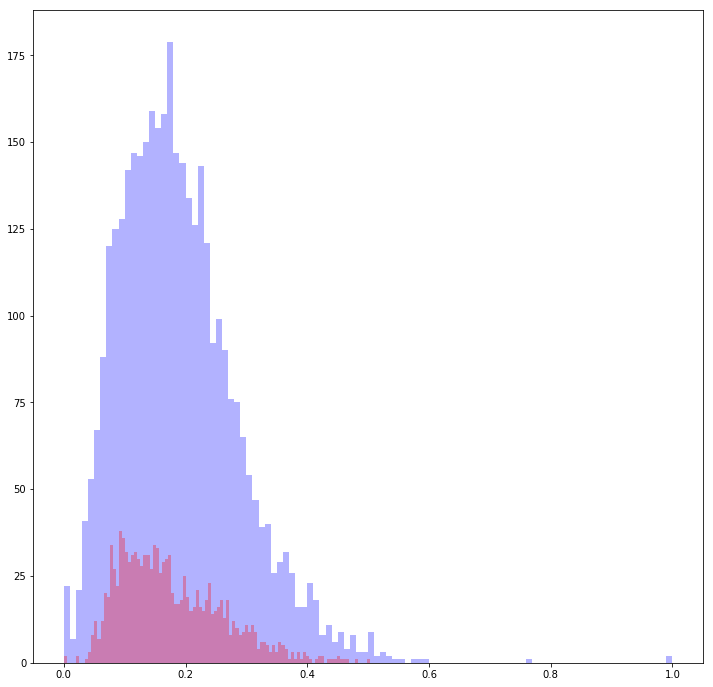

In [68]:
fig, ax = plt.subplots(figsize=(12,12))
ax.hist(temp['Bachelor_percent'].dropna(), alpha=0.3, color='blue', bins=100)
ax.hist(temp1['Bachelor_percent'].dropna(), alpha=0.3, color='red', bins=100);

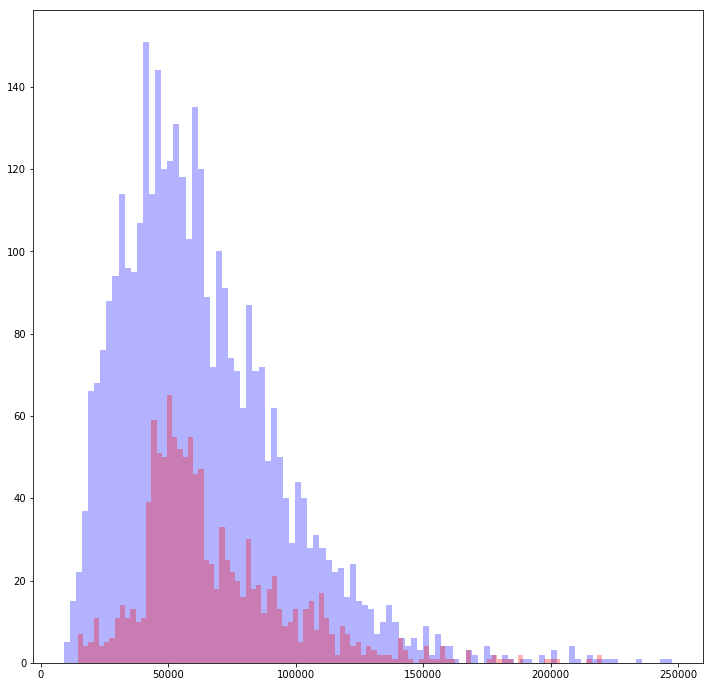

In [69]:
fig, ax = plt.subplots(figsize=(12,12))
ax.hist(temp['Median_income'].dropna(), alpha=0.3, color='blue', bins=100)
ax.hist(temp1['Median_income'].dropna(), alpha=0.3, color='red', bins=100);

In [81]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

/Users/mariamendieta/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [71]:
combined.columns

Index([u'12th_no_dip', u'Some_college', u'Median_income', u'Bachelors',
       u'75k_100k', u'150k_200k', u'Pop_over_25', u'Avg_hh_size',
       u'Hh_w_children', u'35k_50k', u'15k_25k', u'Less_10k', u'Under_5_years',
       u'HighSchool', u'Associate', u'Mean_income', u'200k_more', u'Graduate',
       u'100k_150k', u'10k_15k', u'Less_9th', u'households',
       u'Total_populaton', u'50k_75k', u'25k_35k', u'Median_unit_values',
       u'Median_age', u'NAME', u'state', u'county', u'tract', u'GEOID10',
       u'Tract_Name', u'County_Name', u'State_Name', u'Bachelor_percent',
       u'w_child_percent', u'Affordable_Solar',
       u'Community_Distributed_Generation', u'Expected_KWh_Annual_Production',
       u'Total_Nameplate_kW_DC', u'Project_Cost', u'cost_Kw',
       u'Project_Number', u'Project_yes'],
      dtype='object')

In [72]:
combined.head()

,12th_no_dip,Some_college,Median_income,Bachelors,75k_100k,150k_200k,Pop_over_25,Avg_hh_size,Hh_w_children,35k_50k,...,Bachelor_percent,w_child_percent,Affordable_Solar,Community_Distributed_Generation,Expected_KWh_Annual_Production,Total_Nameplate_kW_DC,Project_Cost,cost_Kw,Project_Number,Project_yes
0,117,385,25179.0,144,66,7,1225,2.44,231,88,...,0.117551,0.283436,0.0,0.0,0.00,0.00,NaN,NaN,0.0,False
1,264,579,26337.0,220,78,59,2758,2.21,420,257,...,0.079768,0.209372,0.0,0.0,87768.03,74.79,23172.45,4974.023375,16.0,True
2,218,512,32244.0,422,214,29,3421,2.19,297,276,...,0.123356,0.128516,0.0,0.0,32221.91,27.45,110980.00,4042.987250,1.0,True
3,138,278,72168.0,455,172,80,2212,1.75,127,178,...,0.205696,0.122469,0.0,0.0,0.00,0.00,NaN,NaN,0.0,False
4,173,376,52857.0,797,301,113,3036,2.02,312,265,...,0.262516,0.135652,0.0,0.0,0.00,0.00,NaN,NaN,0.0,False


In [73]:
temp=combined.drop(['Project_Cost','cost_Kw'], axis=1)
temp = temp.dropna()

In [74]:
temp.head()

,12th_no_dip,Some_college,Median_income,Bachelors,75k_100k,150k_200k,Pop_over_25,Avg_hh_size,Hh_w_children,35k_50k,...,County_Name,State_Name,Bachelor_percent,w_child_percent,Affordable_Solar,Community_Distributed_Generation,Expected_KWh_Annual_Production,Total_Nameplate_kW_DC,Project_Number,Project_yes
0,117,385,25179.0,144,66,7,1225,2.44,231,88,...,Albany County,New York,0.117551,0.283436,0.0,0.0,0.00,0.00,0.0,False
1,264,579,26337.0,220,78,59,2758,2.21,420,257,...,Albany County,New York,0.079768,0.209372,0.0,0.0,87768.03,74.79,16.0,True
2,218,512,32244.0,422,214,29,3421,2.19,297,276,...,Albany County,New York,0.123356,0.128516,0.0,0.0,32221.91,27.45,1.0,True
3,138,278,72168.0,455,172,80,2212,1.75,127,178,...,Albany County,New York,0.205696,0.122469,0.0,0.0,0.00,0.00,0.0,False
4,173,376,52857.0,797,301,113,3036,2.02,312,265,...,Albany County,New York,0.262516,0.135652,0.0,0.0,0.00,0.00,0.0,False


In [75]:
temp['Project_yes'] = temp['Project_yes'].astype(int)

In [76]:
temp.head()

,12th_no_dip,Some_college,Median_income,Bachelors,75k_100k,150k_200k,Pop_over_25,Avg_hh_size,Hh_w_children,35k_50k,...,County_Name,State_Name,Bachelor_percent,w_child_percent,Affordable_Solar,Community_Distributed_Generation,Expected_KWh_Annual_Production,Total_Nameplate_kW_DC,Project_Number,Project_yes
0,117,385,25179.0,144,66,7,1225,2.44,231,88,...,Albany County,New York,0.117551,0.283436,0.0,0.0,0.00,0.00,0.0,0
1,264,579,26337.0,220,78,59,2758,2.21,420,257,...,Albany County,New York,0.079768,0.209372,0.0,0.0,87768.03,74.79,16.0,1
2,218,512,32244.0,422,214,29,3421,2.19,297,276,...,Albany County,New York,0.123356,0.128516,0.0,0.0,32221.91,27.45,1.0,1
3,138,278,72168.0,455,172,80,2212,1.75,127,178,...,Albany County,New York,0.205696,0.122469,0.0,0.0,0.00,0.00,0.0,0
4,173,376,52857.0,797,301,113,3036,2.02,312,265,...,Albany County,New York,0.262516,0.135652,0.0,0.0,0.00,0.00,0.0,0


In [77]:
y = temp['Project_yes']
X = temp[['Avg_hh_size', 'Median_age', 'w_child_percent','Bachelor_percent']]

In [78]:
model = LogisticRegression()
fitted = model.fit(X,y)

In [79]:
fitted.score(X,y)

0.74420638390905114

In [80]:
fitted.coef_

array([[-0.66006297,  0.09558741,  2.81394661, -3.29056072]])

In [83]:
y = temp['Project_yes']
X = temp[['Avg_hh_size', 'Median_age', 'w_child_percent','Bachelor_percent']]
X['intercept']=1

/Users/mariamendieta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
logit = sm.Logit(y,X,missing='drop')
result = logit.fit()
print result.summary()


Optimization terminated successfully.
         Current function value: 0.521083
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Project_yes   No. Observations:                 4574
Model:                          Logit   Df Residuals:                     4569
Method:                           MLE   Df Model:                            4
Date:                Fri, 01 Sep 2017   Pseudo R-squ.:                 0.08283
Time:                        15:29:02   Log-Likelihood:                -2383.4
converged:                       True   LL-Null:                       -2598.7
                                        LLR p-value:                 7.091e-92
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Avg_hh_size         -0.7576      0.114     -6.637      0.000      -0.981      -0.534
Median_age 